In [1]:
# -*- coding: utf-8 -*-
"""
play around
"""
import getpass
import os
import pickle as cp
import sys
import time
import itertools as it
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
from random import uniform
from matplotlib import rcParams 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print "done"

done


(200, 200)

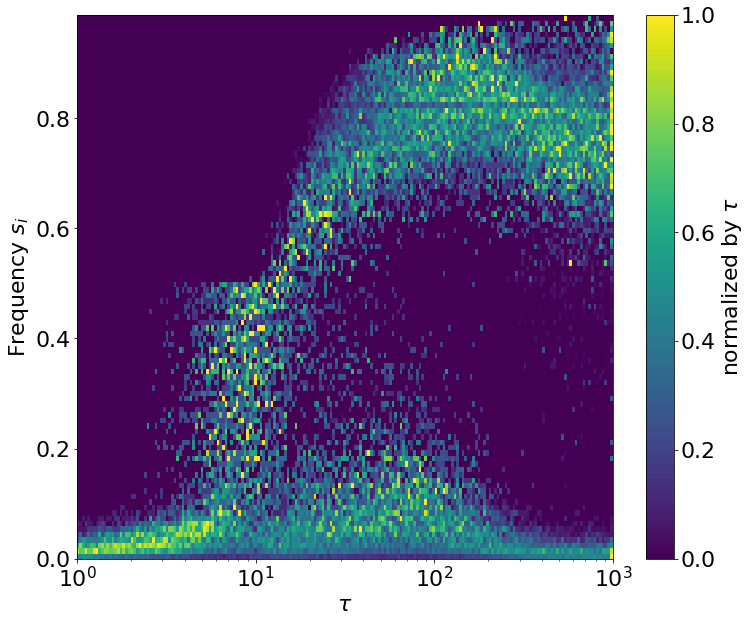

In [3]:
## X2 log 
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,200),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('ttb_bara100_3_log03_200_s200.pdf')
#print norm_data[0,:]

(100, 200)

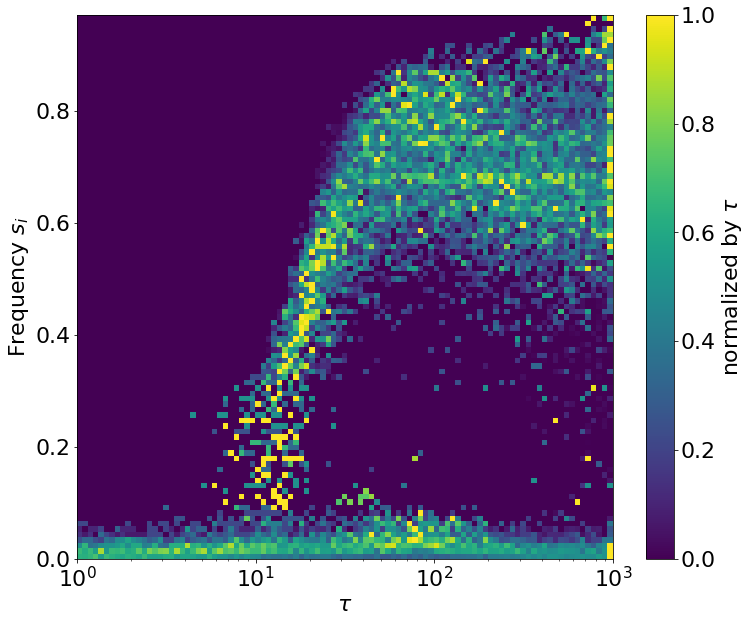

In [4]:
#X2 log alpha03
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log_alpha03/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('ttb_bara100_3_log03_100_s200_alpha03.pdf')
#print norm_data[0,:]

(100, 200)

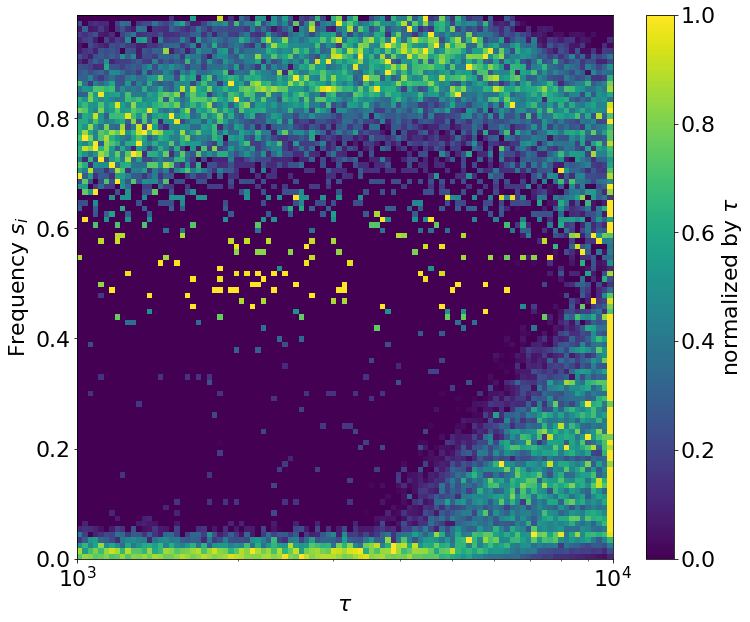

In [12]:
#X2 log large tau
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log_largetau/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(180)]) for j in range(100)], 
               axis= 1, keys = np.logspace(3,4,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(3,4,100),100*180), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(3,4,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('ttb_bara100_3_log34_100_s200.pdf')

In [8]:
xm[1][0]['s']

0     0.772650
1     0.032359
2     0.032359
3     0.032359
4     0.032359
5     0.032359
6     0.772650
7     0.032359
8     0.032359
9     0.772650
10    0.032359
11    0.032359
12    0.032359
13    0.032359
14    0.772650
15    0.032359
16    0.032359
17    0.032359
18    0.032359
19    0.032359
20    0.032359
21    0.032359
22    0.772650
23    0.772650
24    0.772650
25    0.772650
26    0.032359
27    0.032359
28    0.772650
29    0.032359
        ...   
70    0.032359
71    0.032359
72    0.032359
73    0.032359
74    0.032359
75    0.032359
76    0.032359
77    0.032359
78    0.032359
79    0.772650
80    0.032359
81    0.032359
82    0.772650
83    0.772650
84    0.032359
85    0.032359
86    0.772650
87    0.032359
88    0.032359
89    0.032359
90    0.032359
91    0.032359
92    0.032359
93    0.772650
94    0.772650
95    0.032359
96    0.032359
97    0.032359
98    0.032359
99    0.772650
Name: s, Length: 100, dtype: float64

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[nan, nan, nan, 1.0, nan, nan, nan, nan, -1.0, nan, -0.10513109922138068, -1.0, nan, 0.38769905726763282, nan, -1.0, nan, 0.73686394050684967, 1.0, 0.63814689295038873, 1.0, 0.7779886094417483, nan, 0.75697876864126357, 0.81409309519699335, 0.91534031712451913, 0.80316906743003846, 0.8792889980189792, 0.89934065149968234, 0.87263356576157758, 0.93385503154610094, 0.88922915402016733, 0.93047469833994156, 0.98163668759699152, 0.96160382023232815, 0.96457408505991649, 0.94952086103899391, 0.95867945406440247, 0.95665229512984462, 0.97748828081975081]


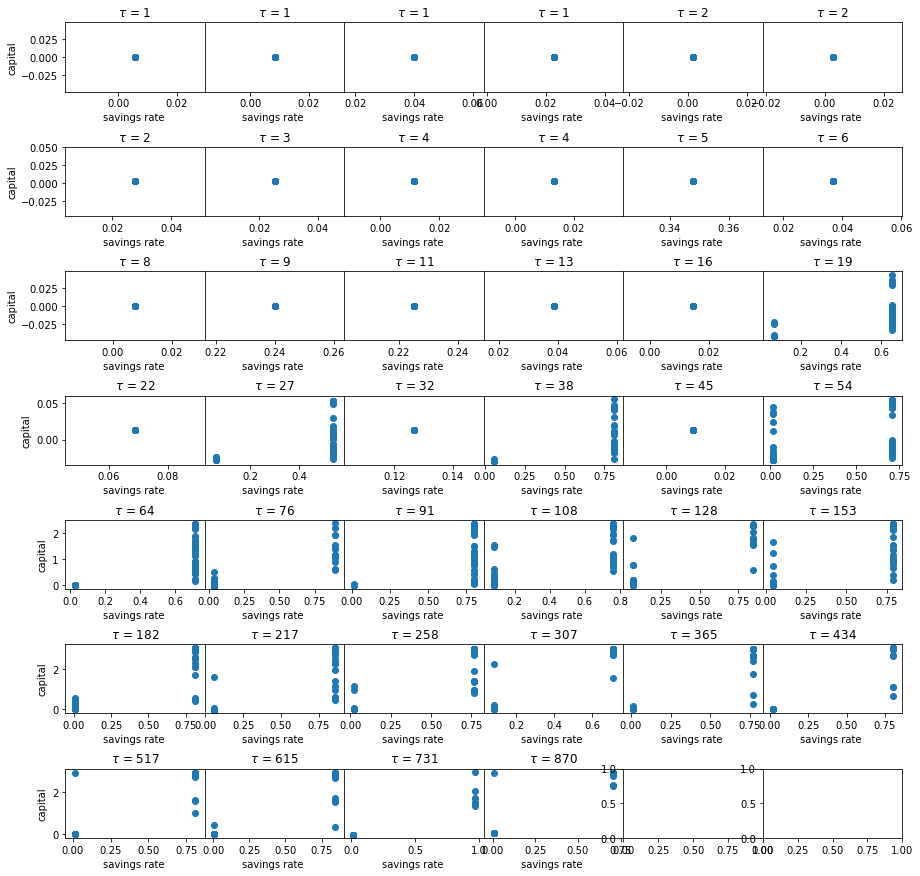

In [3]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()

k1 = pd.concat([ pd.concat([xm[j][i]['k'] for i in range(1)]) for j in range(200)], 
               axis= 1, keys = range(200))

s1 = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(1)]) for j in range(200)], 
               axis= 1, keys = range(200))
#format is tau0 | tau1 | tau2....
#        agent1
#        agent 2..
#        agent N
#        agent N+1
#
rcParams.update({'font.size': 10})

fig, axs = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.001)

axs = axs.ravel()
corr=[]
for a,i in enumerate(range(0,200,5)):
    axs[a].scatter(s1[i],k1[i])
    axs[a].set_title(r'$\tau$ = %s'%(np.int(np.logspace(0,3,200)[i])))
    axs[a].set_xlabel('savings rate ')
    axs[a].set_ylabel('capital')
    corr.append(np.corrcoef(s1[i],k1[i])[0,1])
    if a%6!=0: 
        axs[a].yaxis.set_visible(False)
#fig.savefig('k_s_ttb_bara100_3_log03_200_s200.pdf')
print corr

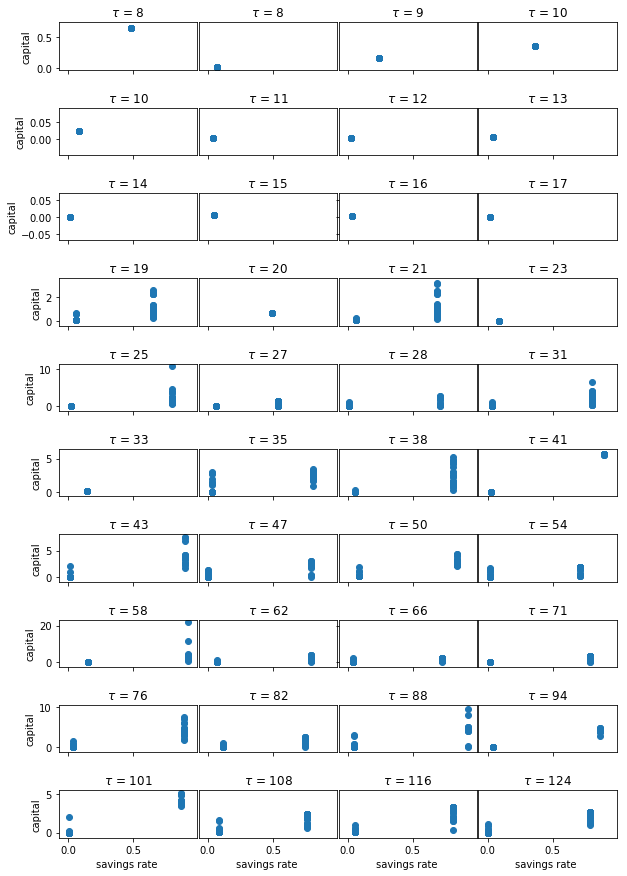

In [9]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()

n=1
kn = pd.concat([ pd.concat([xm[j][i]['k'] for i in range(n)]) for j in range(200)], 
               axis= 1, keys = range(200))

sn = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(n)]) for j in range(200)], 
               axis= 1, keys = range(200))
ll=4
kk=10
fig, axs = plt.subplots(kk,ll, figsize=(10, 15), facecolor='w', edgecolor='k',
                        sharex=True, sharey='row');
fig.subplots_adjust(hspace = .8, wspace=.01);

axs = axs.ravel()
corr=[]
for a,i in enumerate(range(61,140,2)):
    axs[a].scatter(sn[i],kn[i]);
    axs[a].set_title(r'$\tau$ = %s'%(np.int(np.logspace(0,3,200)[i])));
    #axs[a].set_xlabel('savings rate ');
    if a%ll ==0:
        axs[a].set_ylabel('capital');
    else:
        if a%kk!=0: 
            axs[a].yaxis.set_visible(False);
    if a>=ll*(kk-1):
        axs[a].set_xlabel('savings rate ');
    
    
fig.savefig('k_s_ttb_bara100_3_log03_200_s200_single.png',dpi=500)


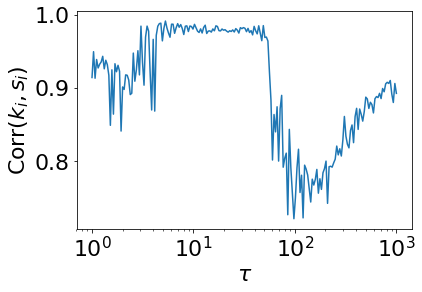

In [22]:
corr=[]
from scipy import stats
fig2 = plt.figure()
for i in range(0,200,1):
    #corr.append(stats.spearmanr(sn[i],kn[i])[0])
    corr.append(np.corrcoef(sn[i],kn[i])[0,1])
plt.semilogx(np.logspace(0,3,200), corr);
plt.xlabel(r'$\tau$');
plt.ylabel(r'Corr($k_i, s_i$)');
#fig2.savefig('k_s_ttb_bara100_3_log03_200_s200_corr.pdf',dpi=500)


(2000000,)

(10000, 200)

(2000000,)

array([ 0.0057473 ,  0.01271566,  0.01777931, ...,  0.00746558,
        0.80616542,  0.00139618])

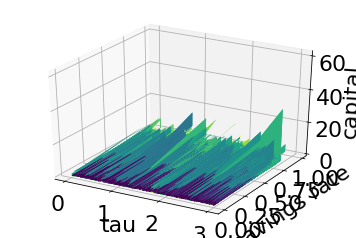

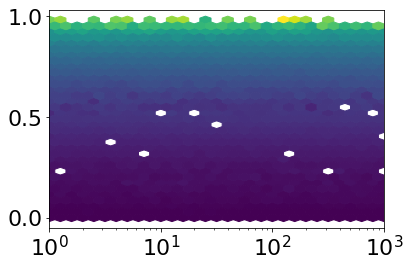

In [13]:
## note;
# this plot would be very interesting to plot cconsumption as the color, can we observe the iso curves?
fig,ax = plt.subplots()
ax.hexbin(np.repeat(np.logspace(0,3,200),n*100), sn.values.ravel(), kn.values.ravel(),
            cmap=plt.get_cmap('viridis'),gridsize=30, bins='log',xscale='log'
           )
ax.set_xscale('log')

In [ ]:
#test to plot k as color s vs tau
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,200),100])
heatmap2, xedges2, yedges2 = np.histogram2d(xedges, kn, 
                                            bins=[xedges,100])



extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
#norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'Capital')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')

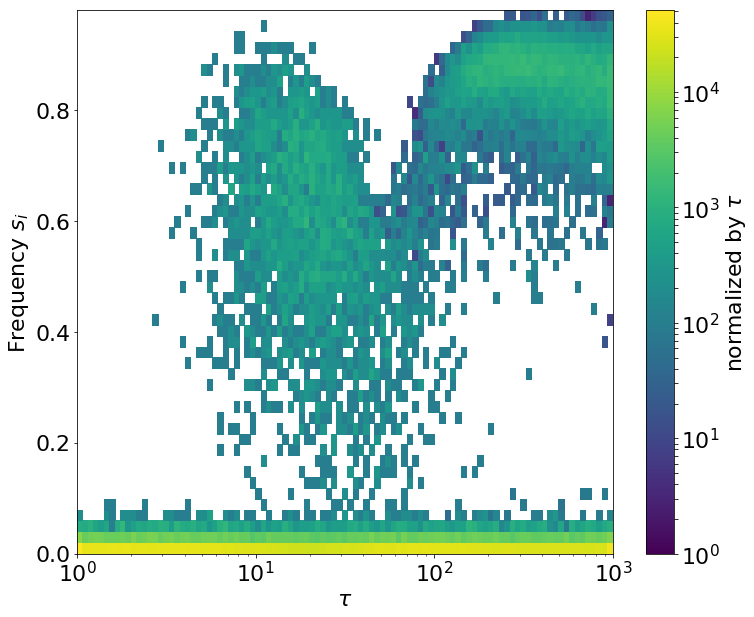

In [17]:
import matplotlib.colors as colors

fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (heatmap.T),  cmap='viridis',norm=colors.LogNorm(vmin=heatmap.min()+1, 
                                                                                     vmax=heatmap.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')

(200, 200)

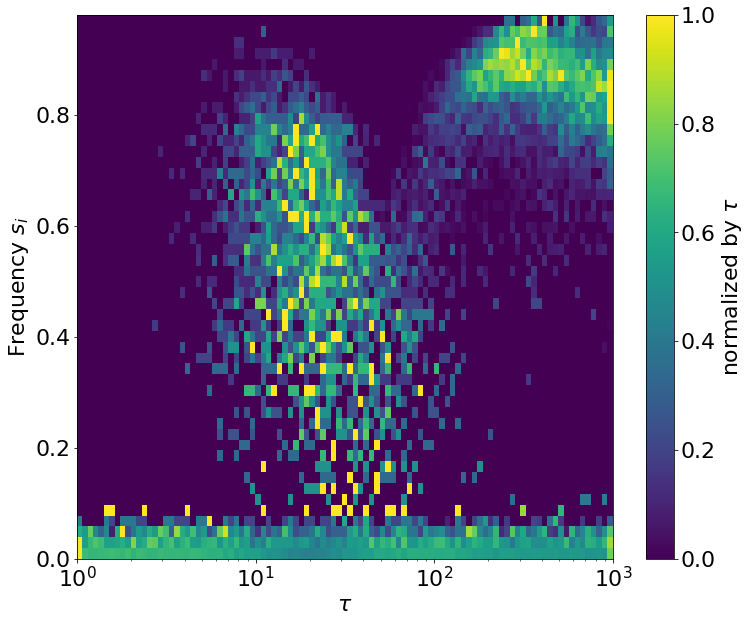

In [16]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2logfully/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),50])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('ttb_fully_log03_200_s200.pdf')

(100, 200)

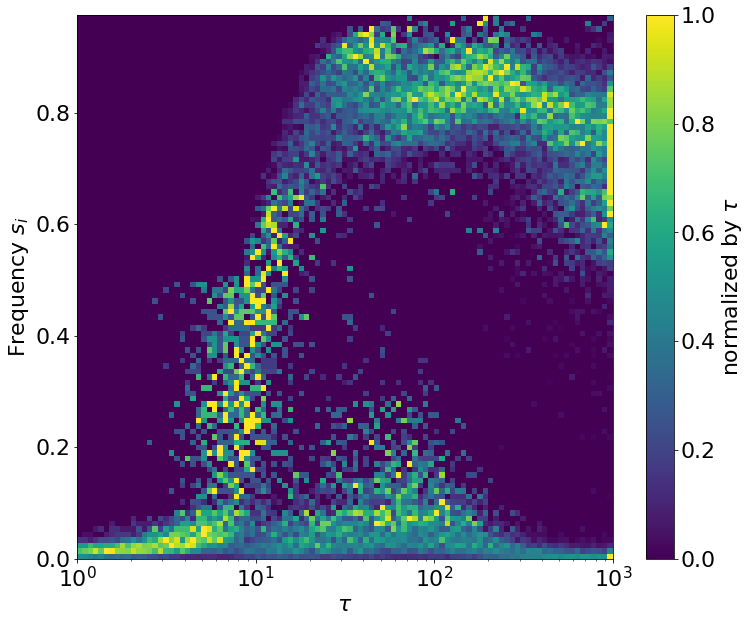

In [28]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log_N200/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*200), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('ttb_bara200_03_log03_200_s200.pdf')

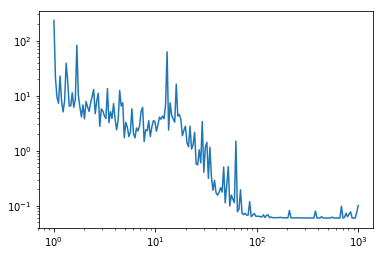

In [4]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_trajectory'
tmp = np.load(loc+name)
tmp = tmp.replace([np.inf, -np.inf], np.nan)
dataframe = tmp.where(tmp < 10**300, np.nan).xs(level=['eps'], key=[0.0])

# get the values of the first two index levels
ivals = dataframe.index.levels[0]
jvals = dataframe.index.levels[1]

# get the values of the last index level
# which will be transformed into colums by unstack()
rl=[]
columns = dataframe.index.levels[-1]
for j, jval in enumerate(jvals):

    # create figure with enough space for ivals*columns plots
    fig = plt.figure(figsize=(4*len(ivals), 2*len(columns)))
    axes = []

    for i, ival in enumerate(ivals):

        # extract the mean and std data for each of the values of the first index
        subset = dataframe.loc[(ival, jval,),
                               'mean_trajectory'].unstack(
            'observables').dropna(axis=0, how='any')
        subset_errors = dataframe.loc[(ival, jval,),
                                      'sem_trajectory'].unstack(
            'observables').dropna(axis=0, how='any')
        rl.append(subset.loc[:, 'r'].mean())
fig = plt.subplots()
plt.loglog(np.logspace(0,3,200),rl)        